In [1]:
import os
import torch 
import torch.nn as nn
import torch.nn.functional as f

import numpy as np
import pandas as pd
import glob
import cv2
import matplotlib.pyplot as plt 
import torchvision.transforms as T
import tqdm
from torch.utils.data import DataLoader, sampler, random_split
from custom_dataset import CustomDataset
from models.ImgEnhanceNet import ImgEnhanceNet

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

In [2]:
os.chdir("./ExDark")

In [3]:
os.getcwd()

'/Users/yongyx/Documents/GRADUATE_CLASSES/ECE 228/Exclusively-Dark-Image-Project/ExDark'

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


## DataLoader

We use the dataloader to load the train, validation and test sets.

In [5]:
NUM_TRAIN = 3000
NUM_VAL = 1800
NUM_TEST = 2563
BATCH_SIZE = 16

img_transform = T.Compose([ T.ToPILImage(),
                            T.RandomCrop((48,48)),
                            T.ToTensor()])
exDark = CustomDataset(os.getcwd(), transform=img_transform)
exDark_train, exDark_val, exDark_test = random_split(exDark, [NUM_TRAIN, NUM_VAL, NUM_TEST])

train_loader = DataLoader(exDark_train, batch_size=1, num_workers=0,
                         sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
val_loader = DataLoader(exDark_val, batch_size=BATCH_SIZE, num_workers=0,
                         sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))
test_loader = DataLoader(exDark_test, batch_size=BATCH_SIZE, num_workers=0,
                         sampler=sampler.SubsetRandomSampler(range(NUM_TEST)))                       

## Training


In [30]:
# for i, (img, class_) in enumerate(train_loader):
#     print(img.shape)
#     # plt.imshow(img[0,:].permute(1,2,0).detach().numpy())
#     plt.imshow(cv2.cvtColor(img[0,:].permute(1,2,0).detach().numpy(), cv2.COLOR_BGR2RGB))
#     plt.show()

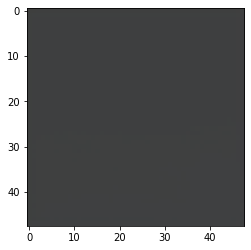

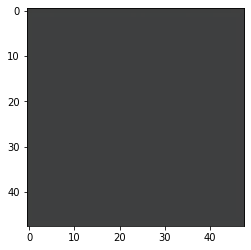

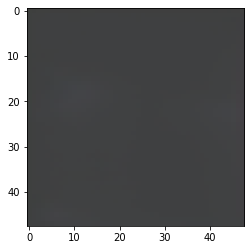

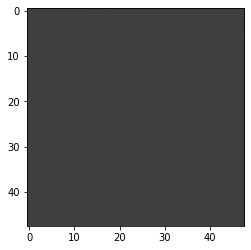

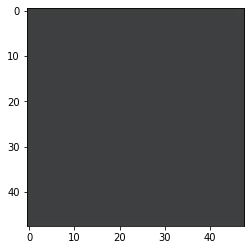

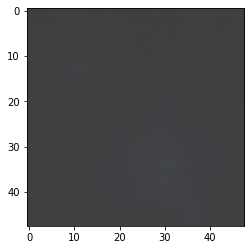

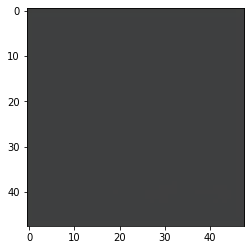

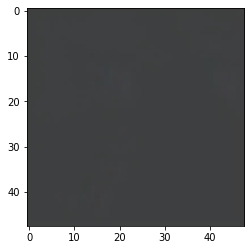

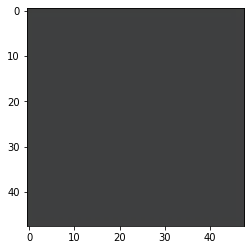

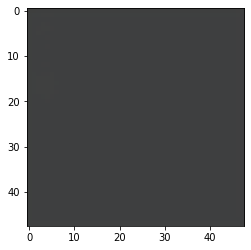

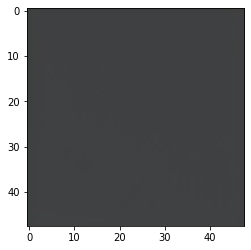

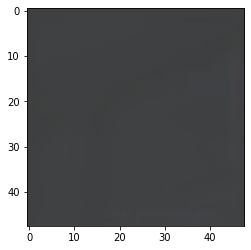

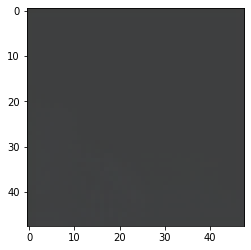

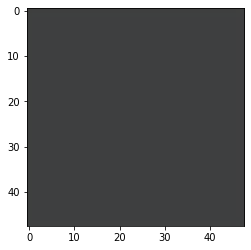

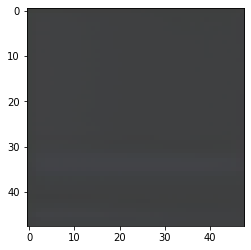

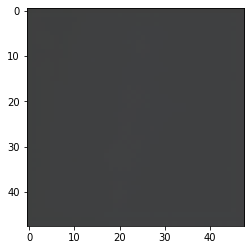

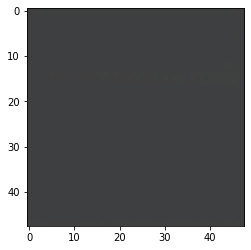

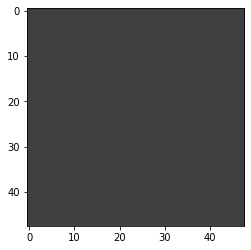

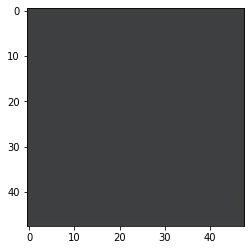

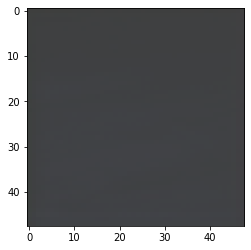

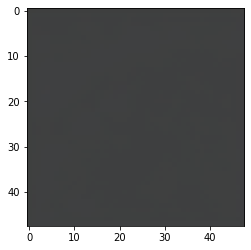

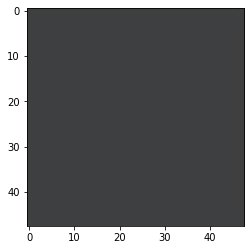

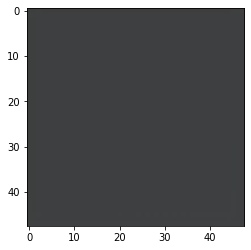

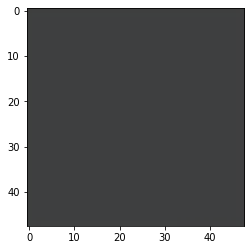

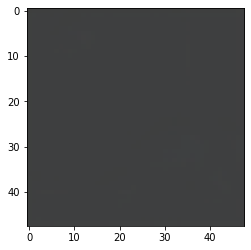

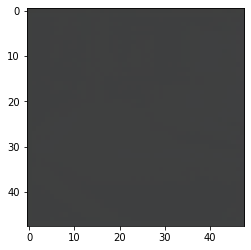

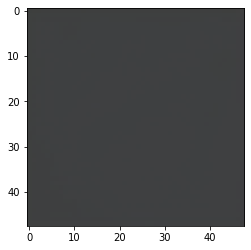

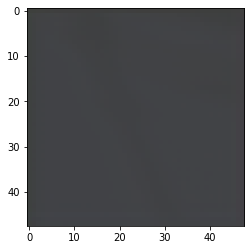

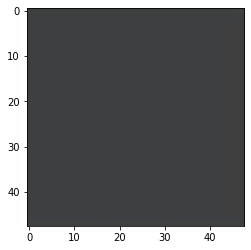

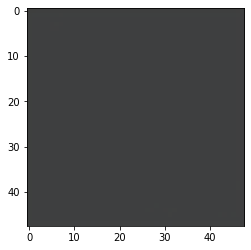

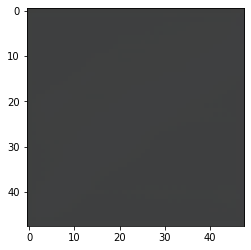

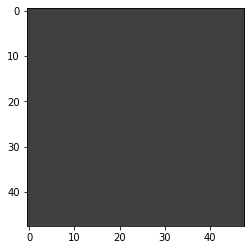

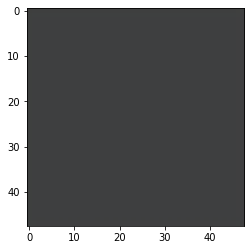

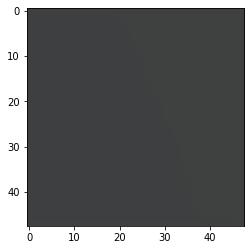

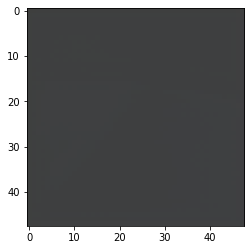

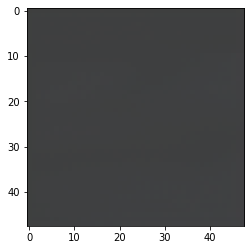

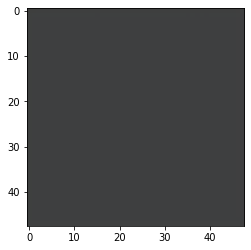

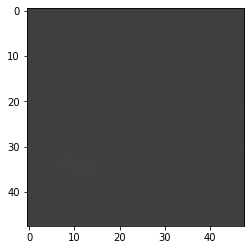

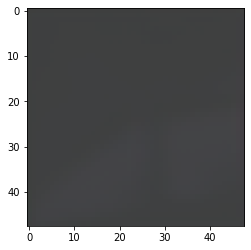

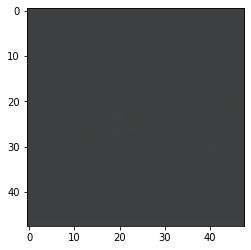

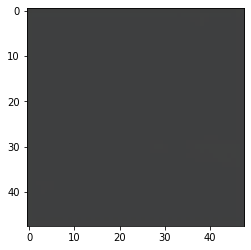

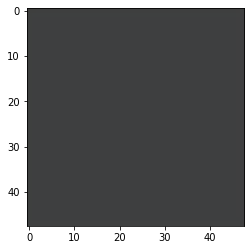

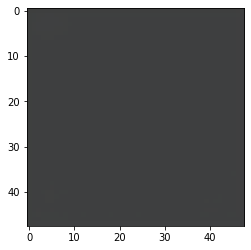

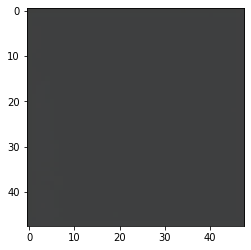

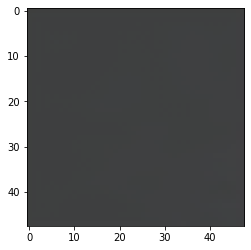

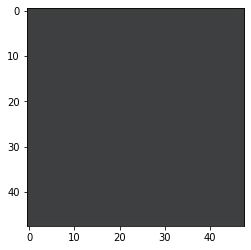

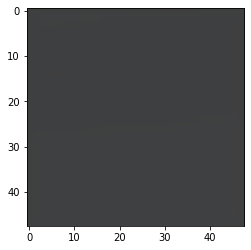

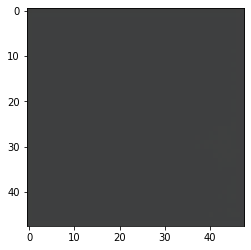

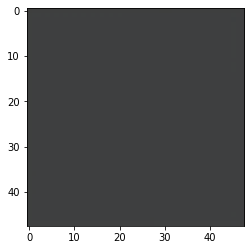

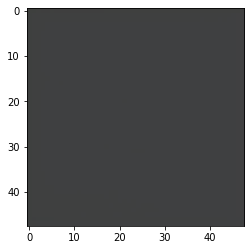

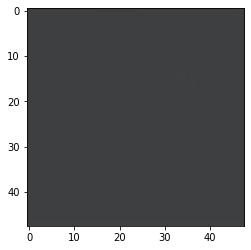

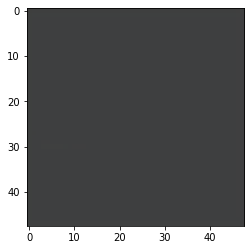

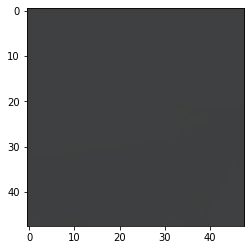

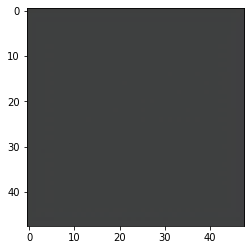

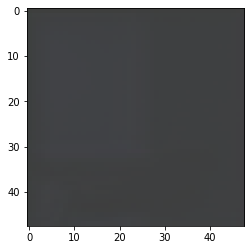

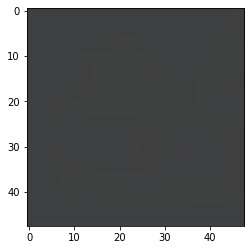

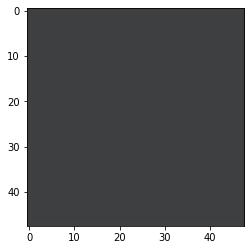

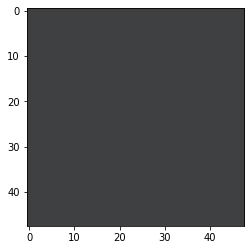

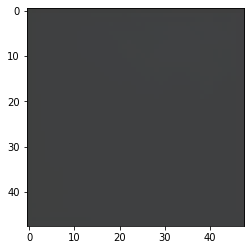

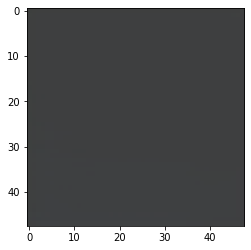

libpng warning: iCCP: known incorrect sRGB profile


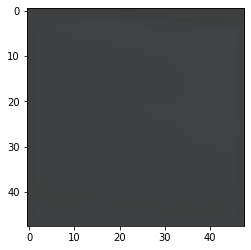

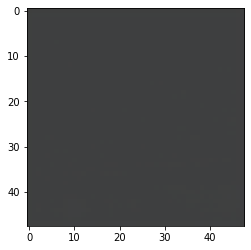

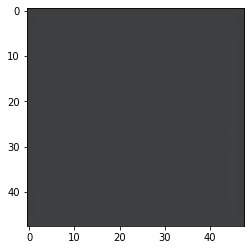

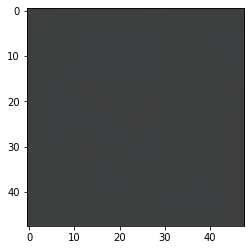

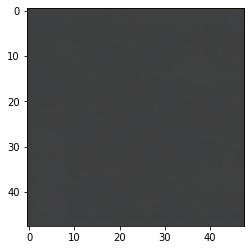

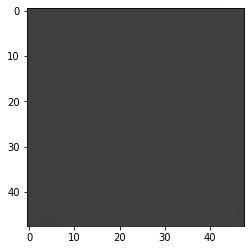

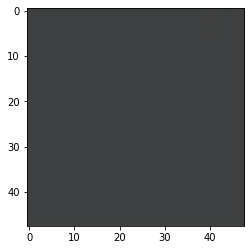

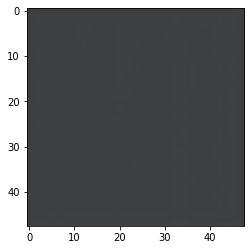

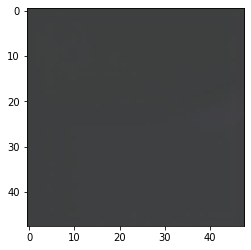

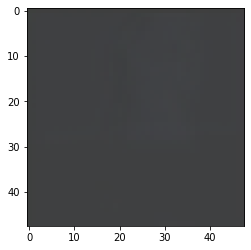

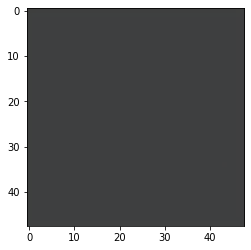

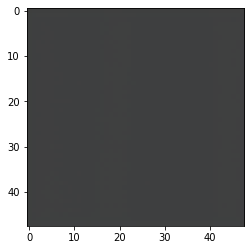

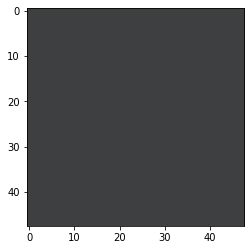

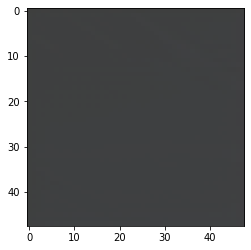

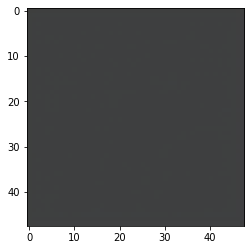

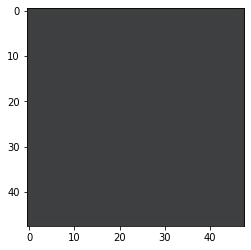

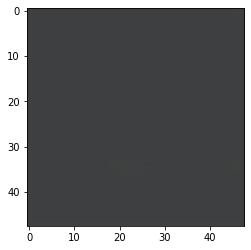

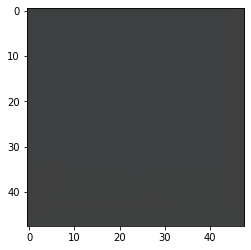

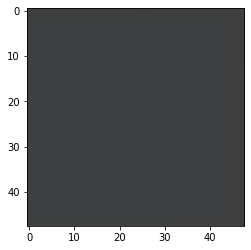

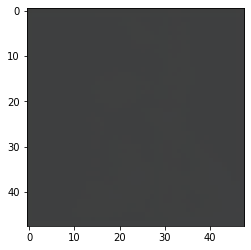

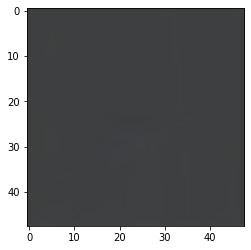

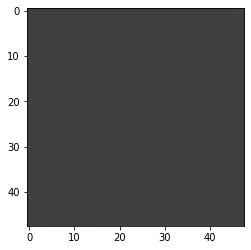

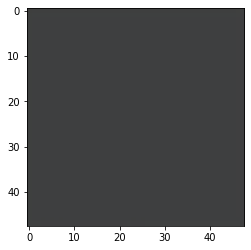

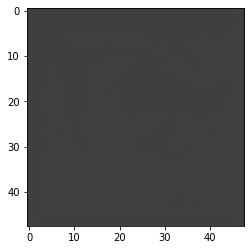

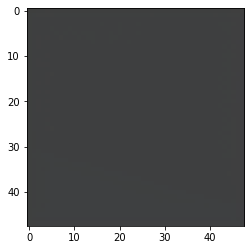

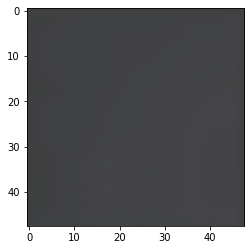

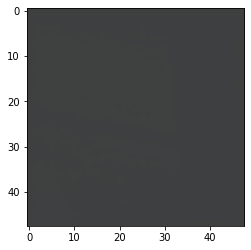

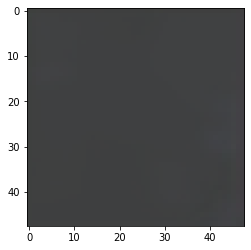

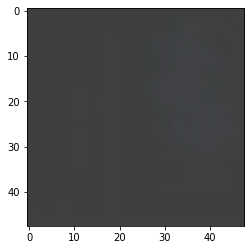

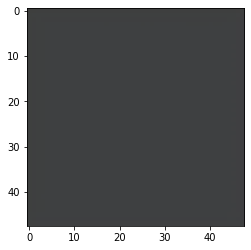

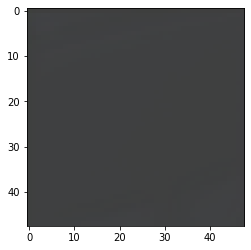

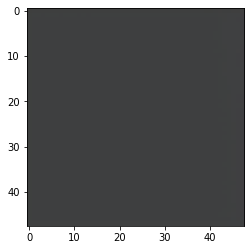

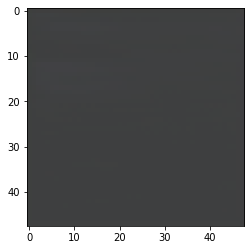

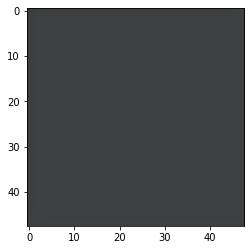

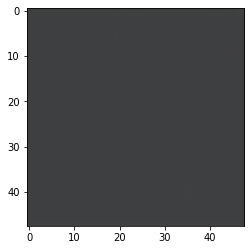

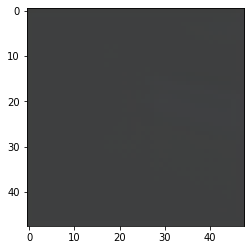

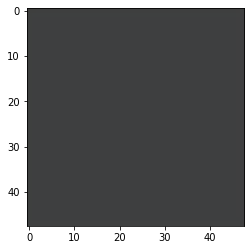

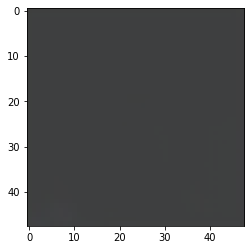

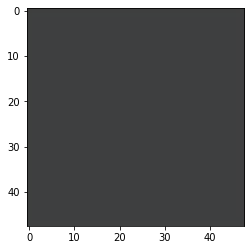

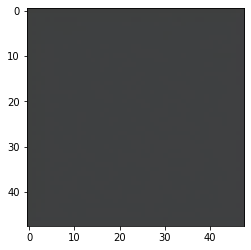

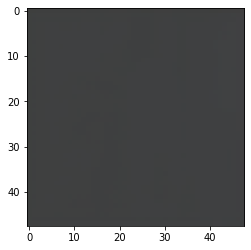

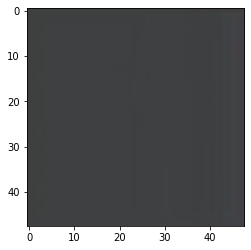

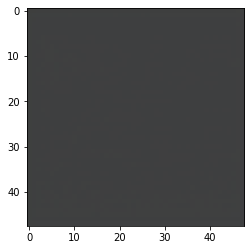

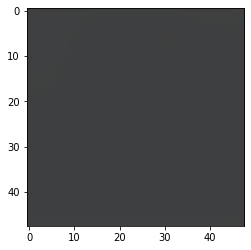

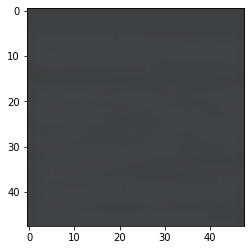

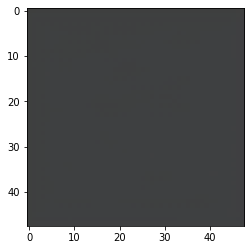

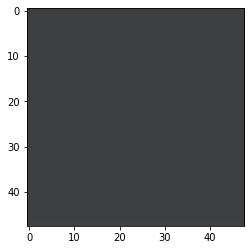

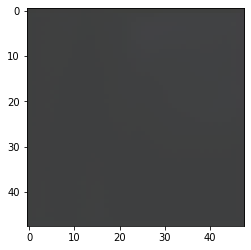

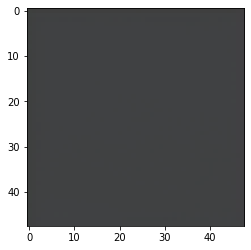

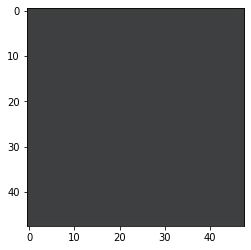

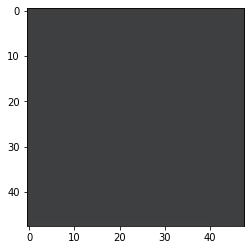

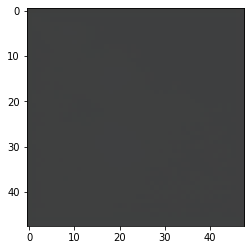

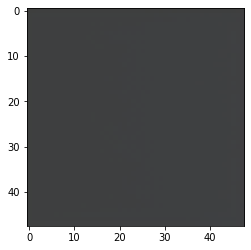

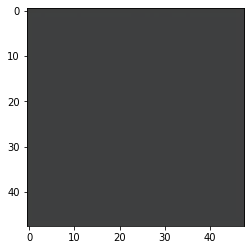

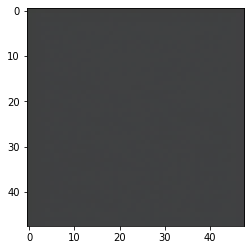

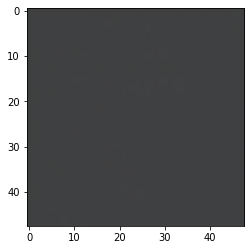

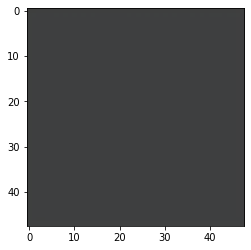

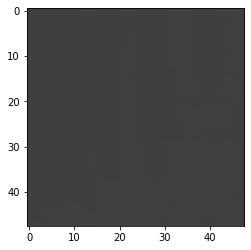

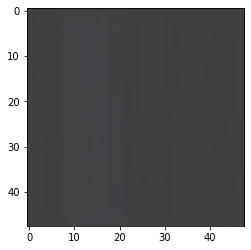

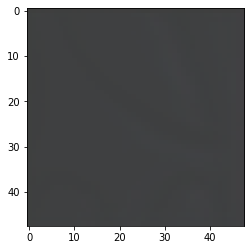

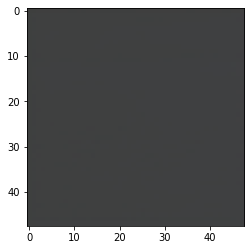

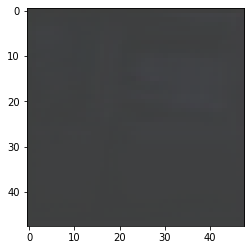

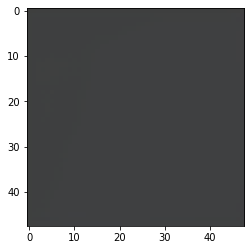

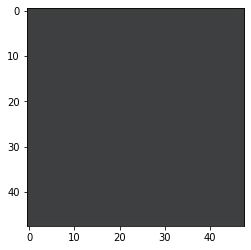

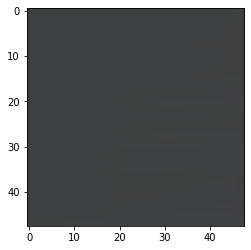

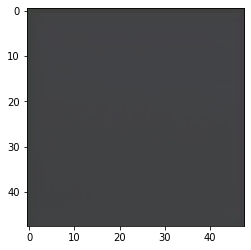

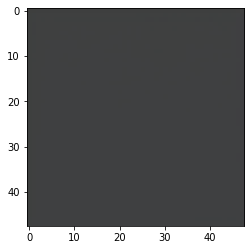

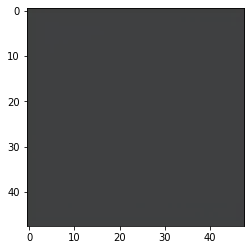

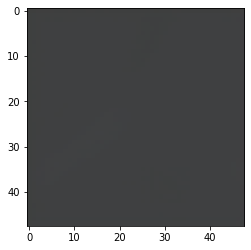

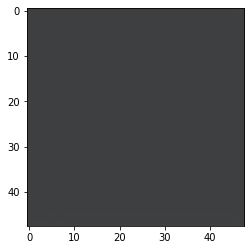

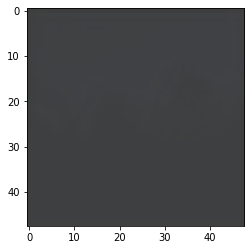

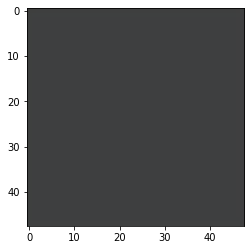

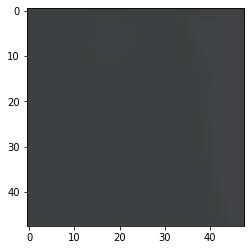

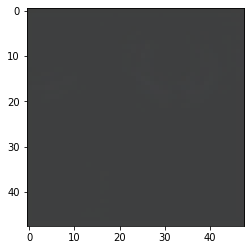

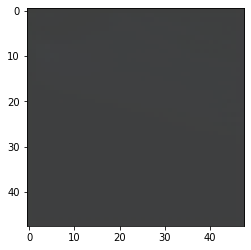

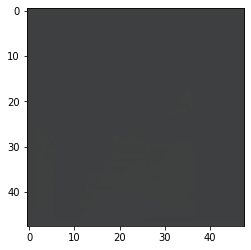

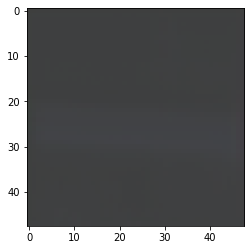

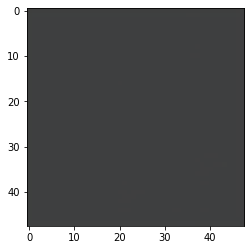

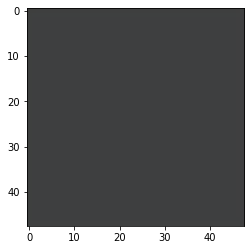

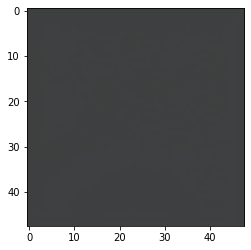

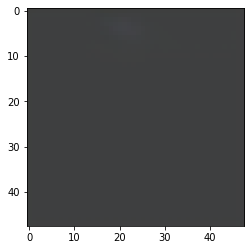

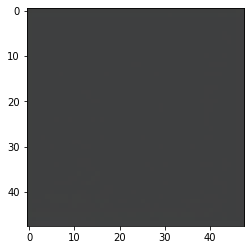

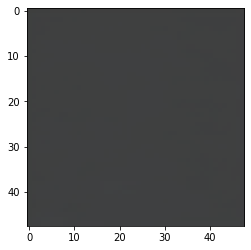

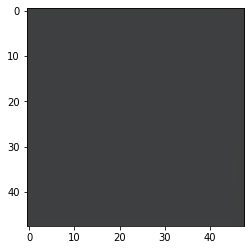

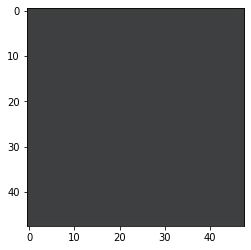

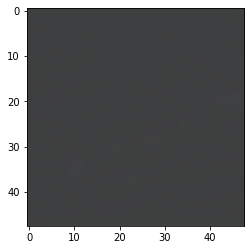

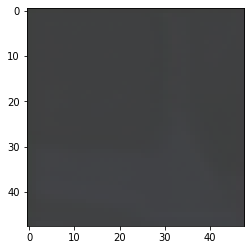

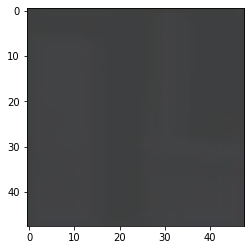

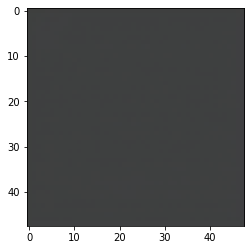

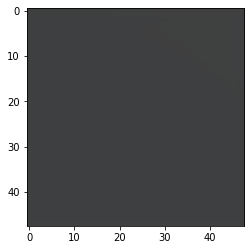

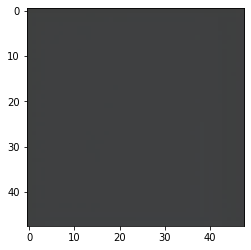

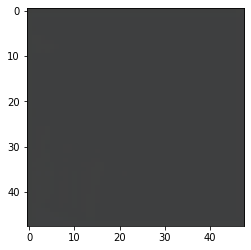

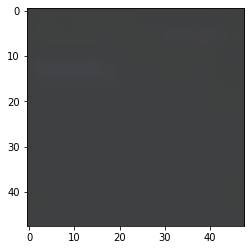

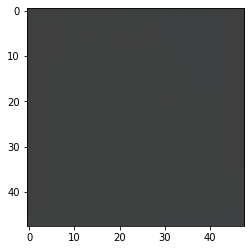

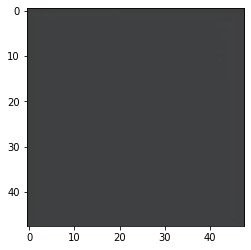

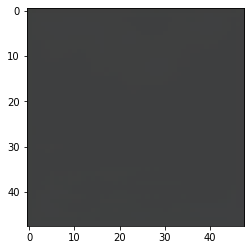

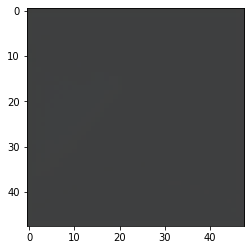

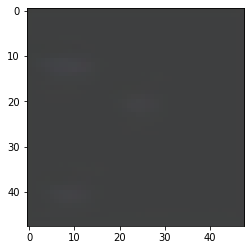

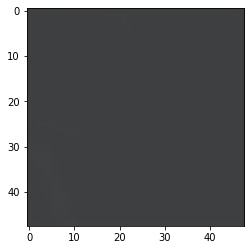

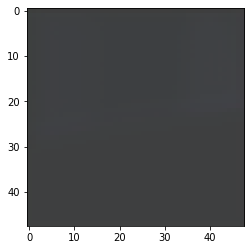

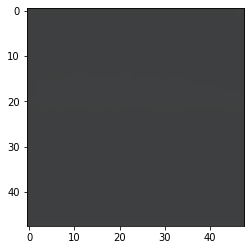

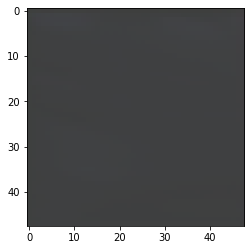

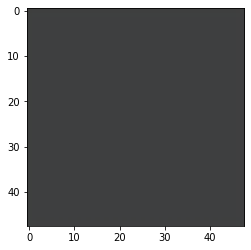

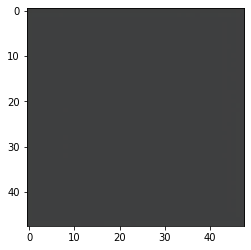

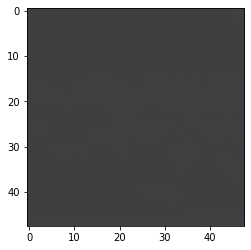

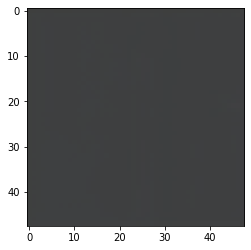

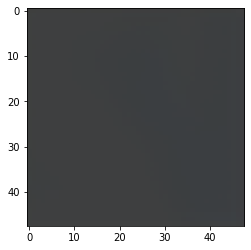

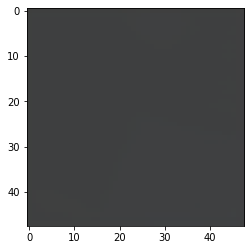

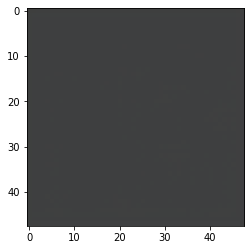

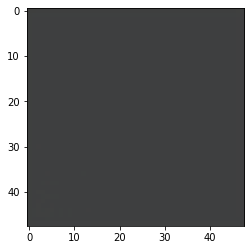

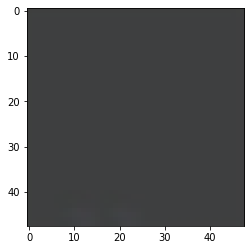

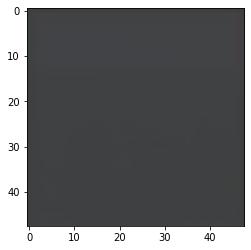

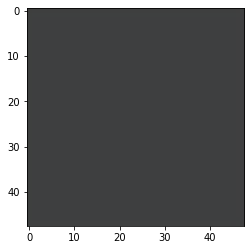

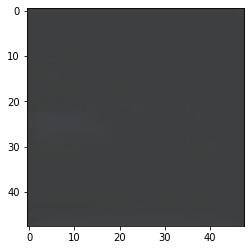

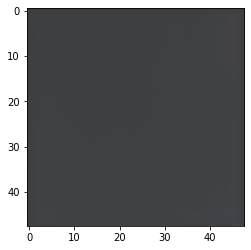

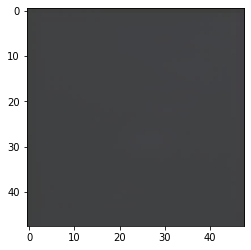

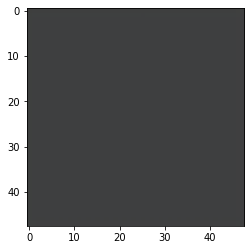

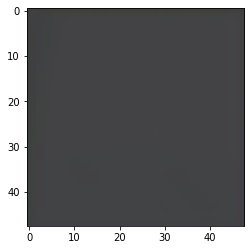

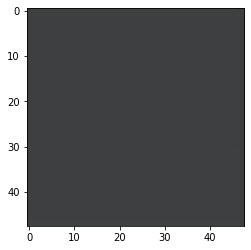

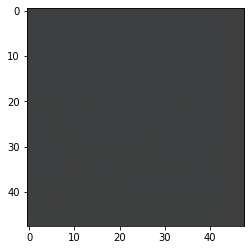

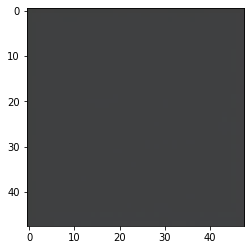

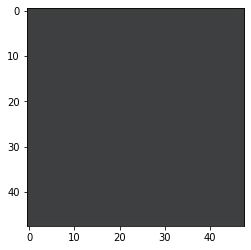

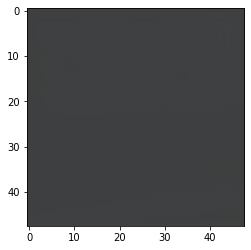

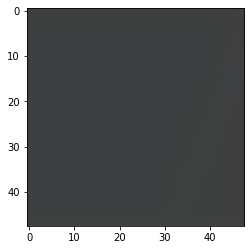

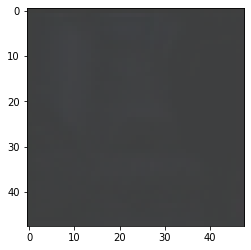

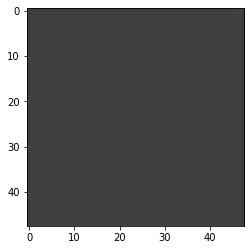

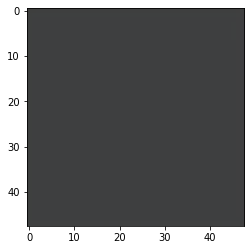

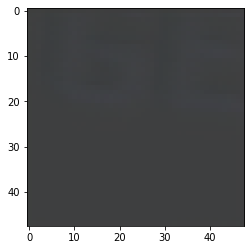

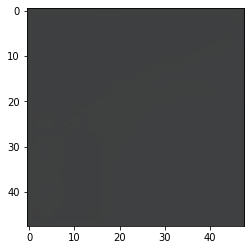

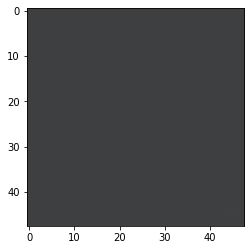

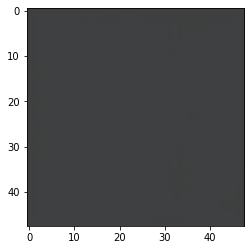

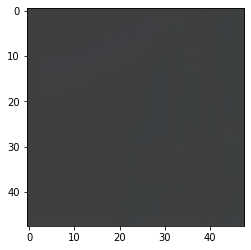

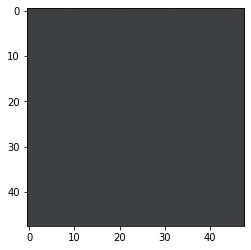

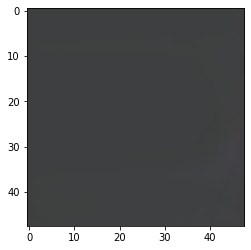

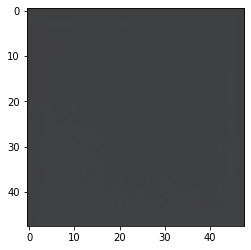

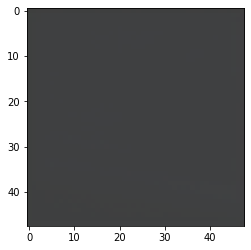

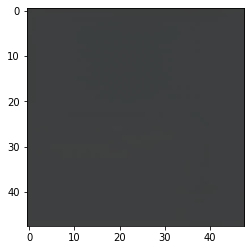

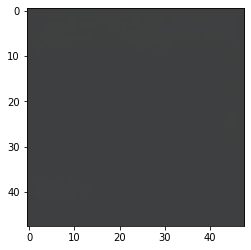

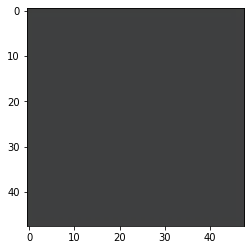

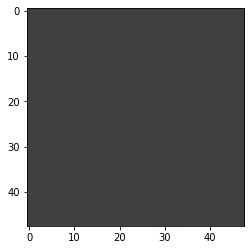

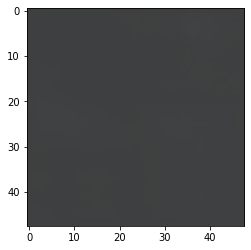

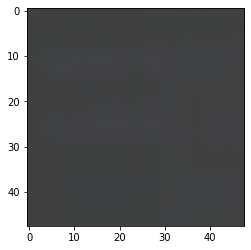

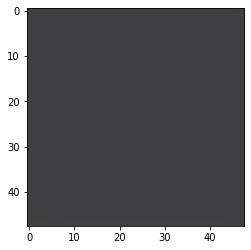

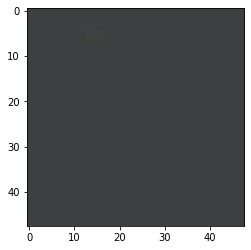

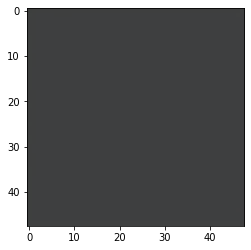

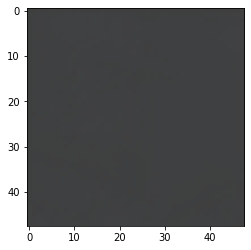

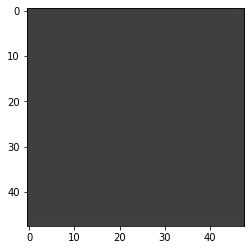

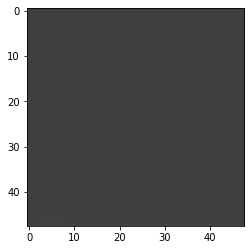

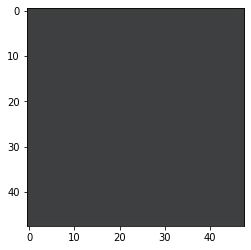

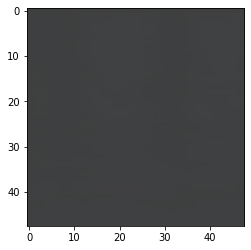

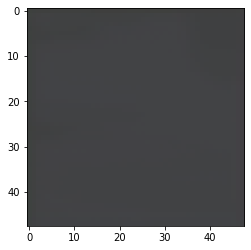

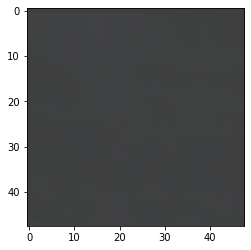

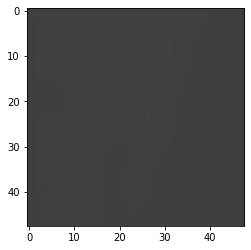

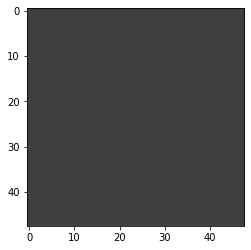

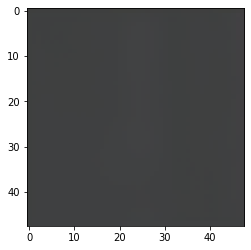

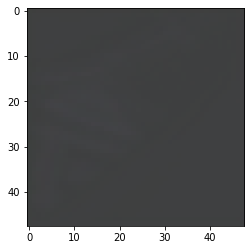

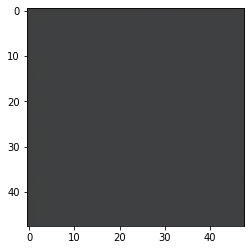

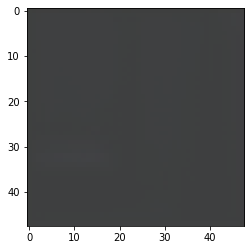

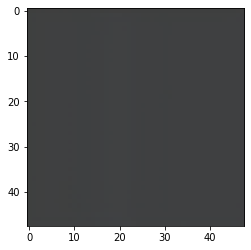

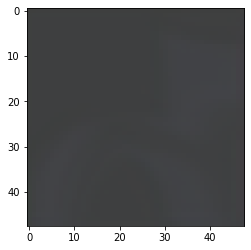

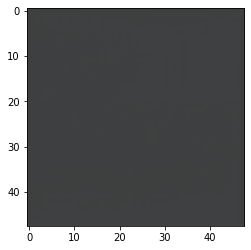

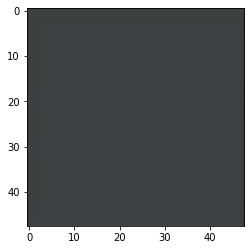

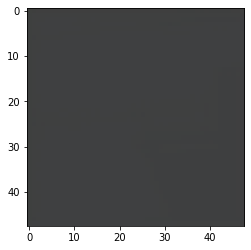

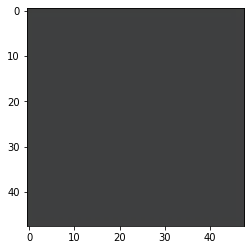

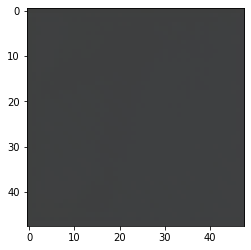

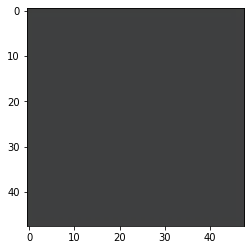

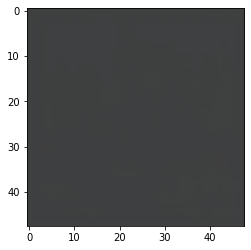

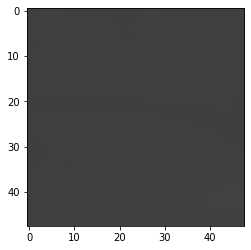

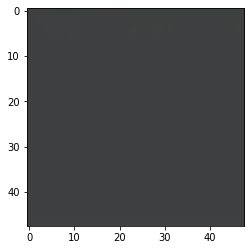

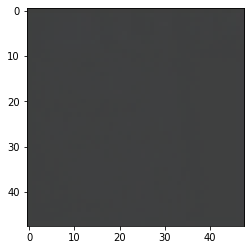

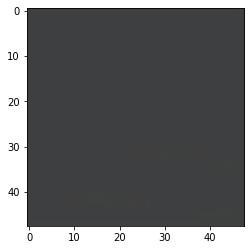

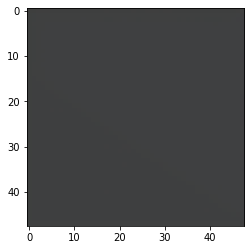

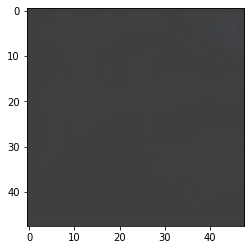

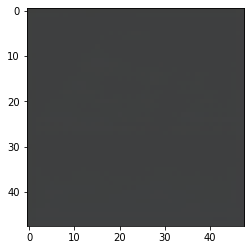

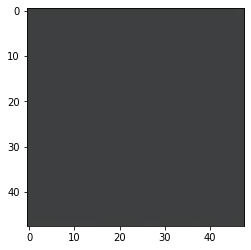

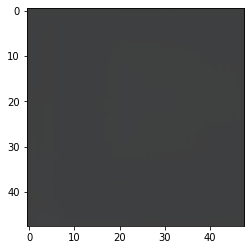

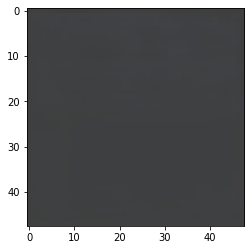

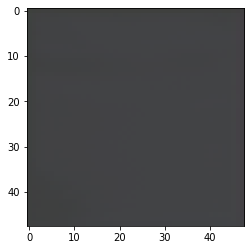

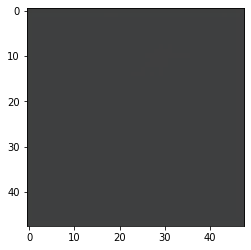

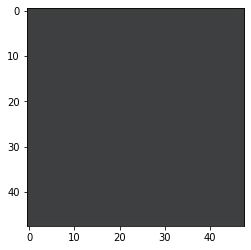

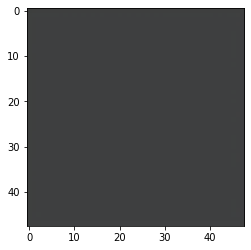

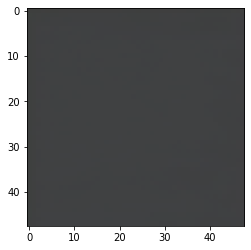

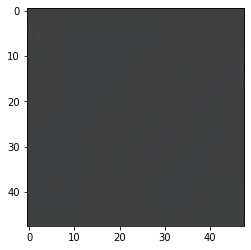

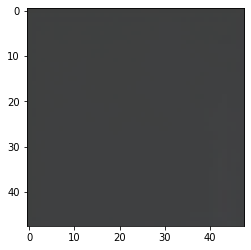

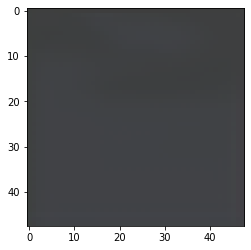

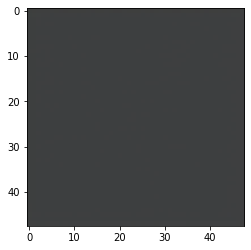

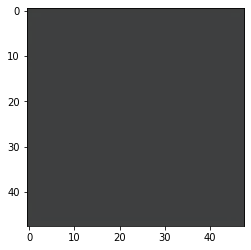

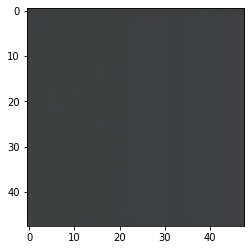

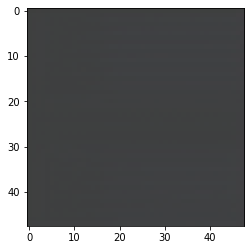

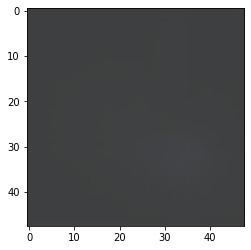

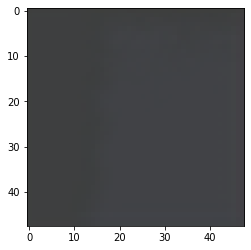

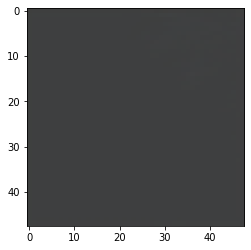

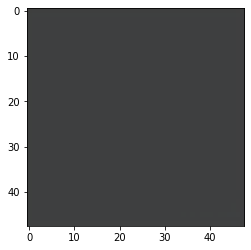

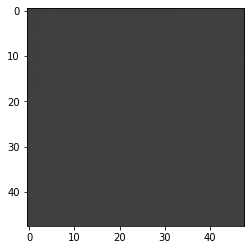

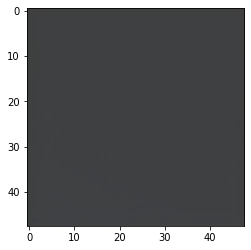

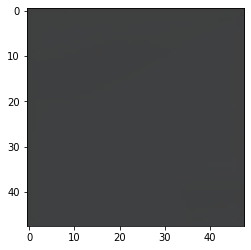

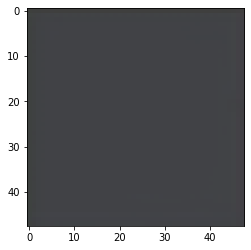

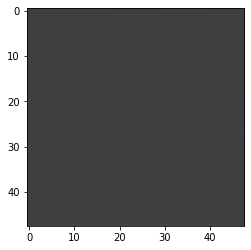

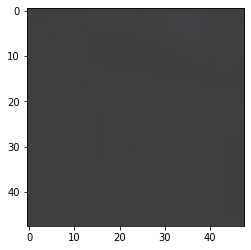

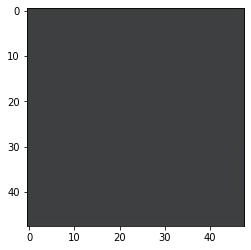

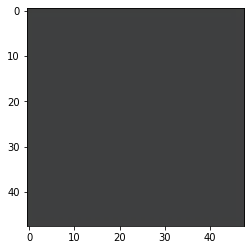

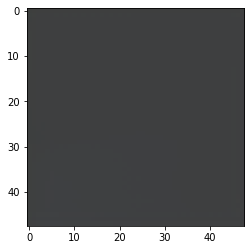

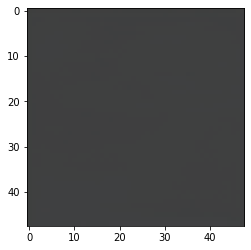

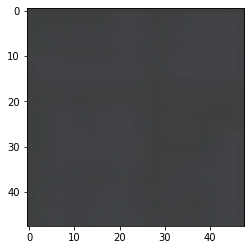

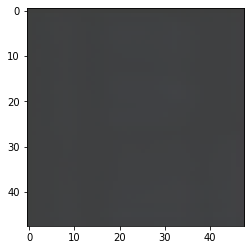

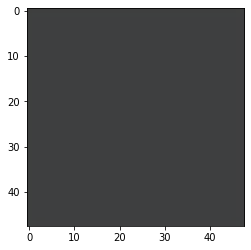

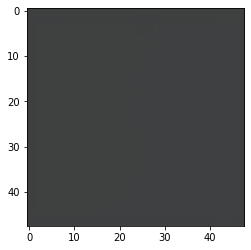

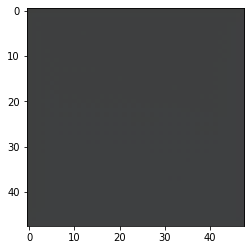

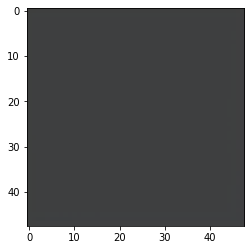

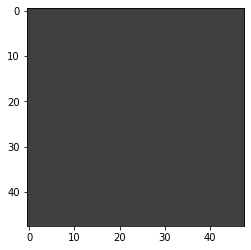

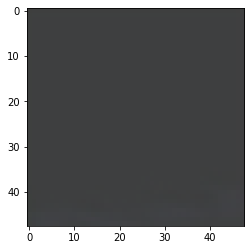

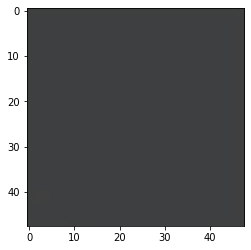

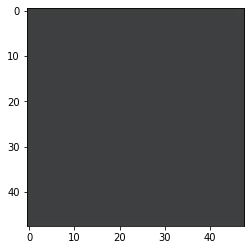

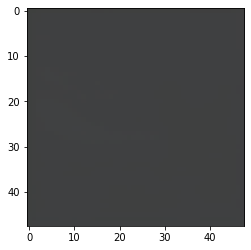

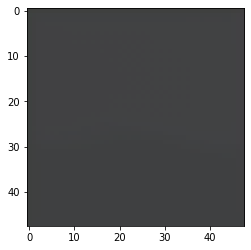

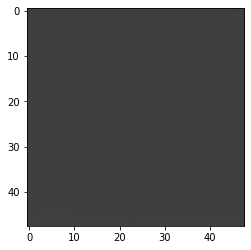

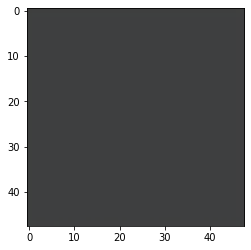

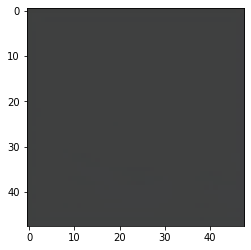

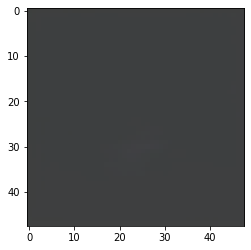

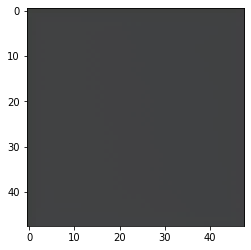

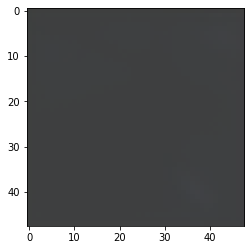

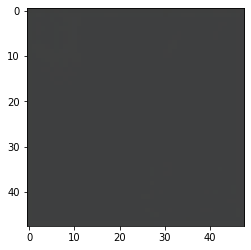

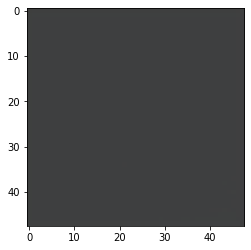

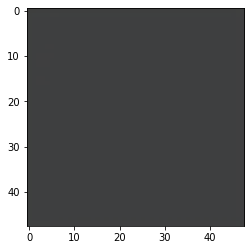

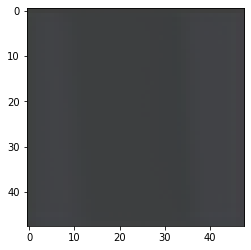

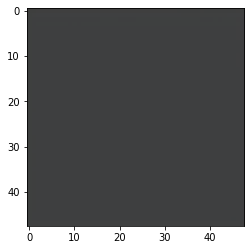

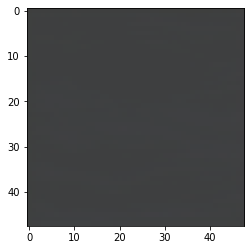

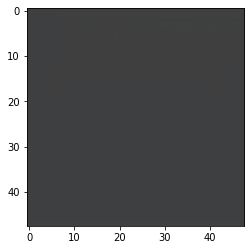

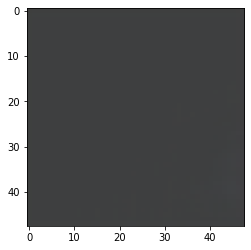

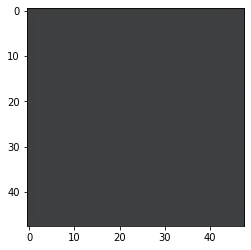

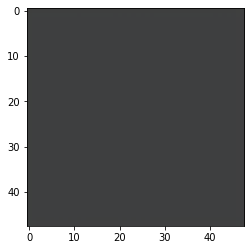

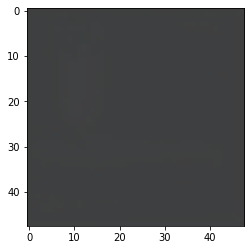

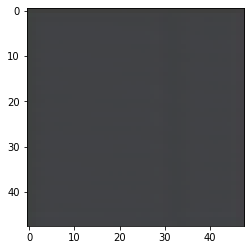

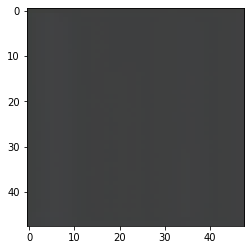

KeyboardInterrupt: 

In [11]:
model = ImgEnhanceNet()
model = model.to(device=device)
for e in range(10):
    for i, (img, class_) in enumerate(train_loader):
        model.train()
        x =  img.to(device=device, dtype = torch.float32)
        R,L = model(x)
        # image = R*torch.cat((L,L,L), axis=1)
        # plt.imshow(cv2.cvtColor(image[0,].permute(1,2,0).detach().numpy(), cv2.COLOR_BGR2RGB))
        # plt.show()
print("done")

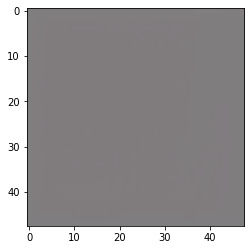

In [45]:
plt.imshow(cv2.cvtColor(scores[0,0:3].permute(1,2,0).detach().numpy(), cv2.COLOR_BGR2RGB))